In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk(r'D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image\0\hand1_0_bot_seg_1_cropped.jpeg
D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image\0\hand1_0_bot_seg_2_cropped.jpeg
D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image\0\hand1_0_bot_seg_3_cropped.jpeg
D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image\0\hand1_0_bot_seg_4_cropped.jpeg
D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image\0\hand1_0_bot_seg_5_cropped.jpeg
D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image\0\hand1_0_dif_seg_1_cropped.jpeg
D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image\0\hand1_0_dif_seg_2_cropped.jpeg
D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image\0\hand1_0_dif_seg_3_cropped.jpeg
D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image\0\hand1_0_dif_seg_4_cropped.jpeg
D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image\0\hand1_0_dif_seg_5_cropped.jpeg
D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image\0\hand1_0_

In [2]:
from os import listdir
total_signs=sorted(listdir(r"D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image"))
print(total_signs)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [3]:
# Important imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
#from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.utils import img_to_array, array_to_img, to_categorical
from tensorflow.keras.optimizers import Adam

from PIL import Image
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU
from sklearn.model_selection import train_test_split

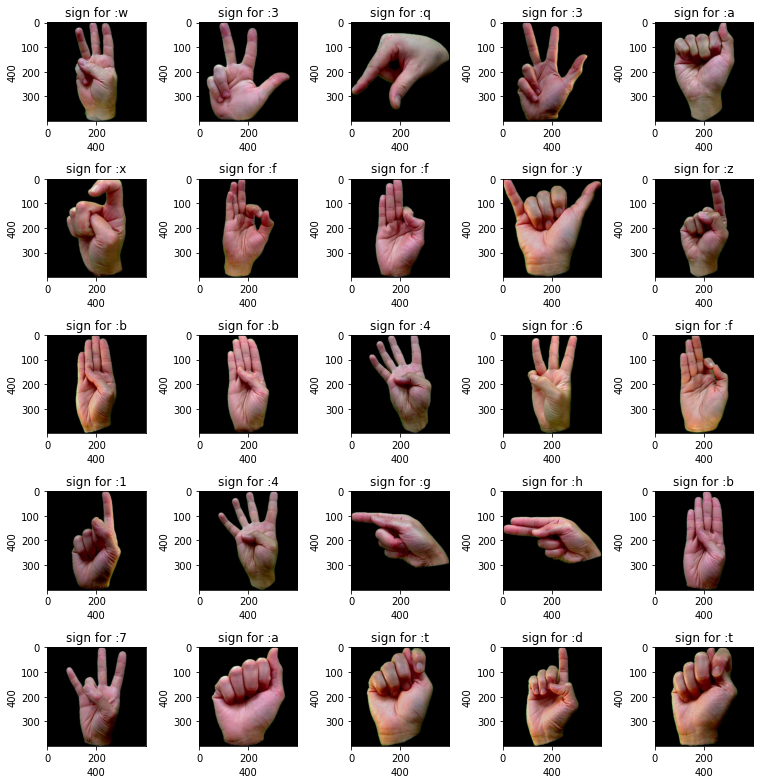

In [172]:
# Plotting 25 images to check dataset
plt.figure(figsize=(11,11))
path = r"D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image"
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    directry=random.choice(total_signs)
    rand_img = imread(path +'/'+ directry+'/'+random.choice(sorted(listdir(path+'/'+directry+'/'))))
    plt.imshow(rand_img)
    plt.title('sign for :'+directry)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [4]:
for each in total_signs:
    print(pd.value_counts(r"D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image"+each))

D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image0    60
dtype: int64
D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image1    60
dtype: int64
D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image2    60
dtype: int64
D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image3    60
dtype: int64
D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image4    60
dtype: int64
D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image5    60
dtype: int64
D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image6    60
dtype: int64
D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image7    60
dtype: int64
D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image8    60
dtype: int64
D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image9    60
dtype: int64
D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_imagea    60
dtype: int64
D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_imageb    60
dtype: int64
D:\HK 2 2021 - 2022\AI\project-cuoiki\fi

In [5]:
add = r"D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image/"
root_add = listdir(add)
image_list, label_list = [], []
print(root_add)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [6]:
import numpy as np
# Reading and converting image to numpy array
for directory in root_add:
    for files in listdir(f"{add}/{directory}"):
        image_path = f"{add}/{directory}/{files}"
        image = Image.open(image_path)
        image = image.resize((50,50)) # All images does not have same dimension
        image = img_to_array(image)
        image_list.append(image)
        label_list.append(directory)

In [7]:
# Visualize the number of classes count
print(directory)
label_counts = pd.DataFrame(label_list).value_counts()
sorted(label_counts)

z


[65,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70]

In [8]:
num_classes = len(label_counts)
num_classes

36

In [9]:
np.array(image_list).shape

(2515, 50, 50, 3)

In [10]:
label_list = np.array(label_list)
label_list.shape

(2515,)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [24]:
X_train = np.array(X_train, dtype=np.float16) / 225.0
X_test = np.array(X_test, dtype=np.float16) / 225.0
X_train = X_train.reshape( -1, 50,50,3)
X_test = X_test.reshape( -1, 50,50,3)

In [25]:
X_train.shape

(2012, 50, 50, 3)

In [26]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h'
 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [27]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

In [28]:
print(y_train.shape)
print(X_train.shape)

(1609, 36)
(1609, 50, 50, 3)


In [29]:
import tensorflow as tf
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(50,50,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(90, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(90, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(60, activation="relu"))
model.add(Flatten())

model.add(Dense(40, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 90)        26010     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 90)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 90)         

In [37]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size = 200, epochs =30,validation_data=(X_val,y_val))

Epoch 1/30
9/9 [==============================] - 3s 291ms/step - loss: 0.4377 - accuracy: 0.8372 - val_loss: 0.3294 - val_accuracy: 0.8859
Epoch 2/30
9/9 [==============================] - 3s 284ms/step - loss: 0.3531 - accuracy: 0.8695 - val_loss: 0.3099 - val_accuracy: 0.9007
Epoch 3/30
9/9 [==============================] - 3s 313ms/step - loss: 0.3626 - accuracy: 0.8639 - val_loss: 0.2909 - val_accuracy: 0.9007
Epoch 4/30
9/9 [==============================] - 3s 307ms/step - loss: 0.3175 - accuracy: 0.8813 - val_loss: 0.3326 - val_accuracy: 0.8908
Epoch 5/30
9/9 [==============================] - 3s 294ms/step - loss: 0.2916 - accuracy: 0.8825 - val_loss: 0.2338 - val_accuracy: 0.9231
Epoch 6/30
9/9 [==============================] - 3s 328ms/step - loss: 0.2824 - accuracy: 0.8943 - val_loss: 0.2326 - val_accuracy: 0.9181
Epoch 7/30
9/9 [==============================] - 3s 307ms/step - loss: 0.2584 - accuracy: 0.9080 - val_loss: 0.1953 - val_accuracy: 0.9355
Epoch 8/30
9/9 [====

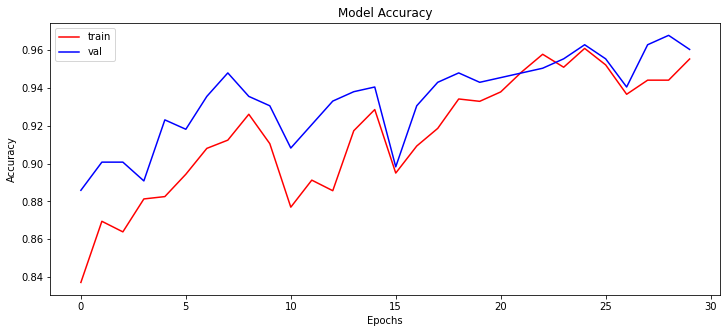

In [38]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

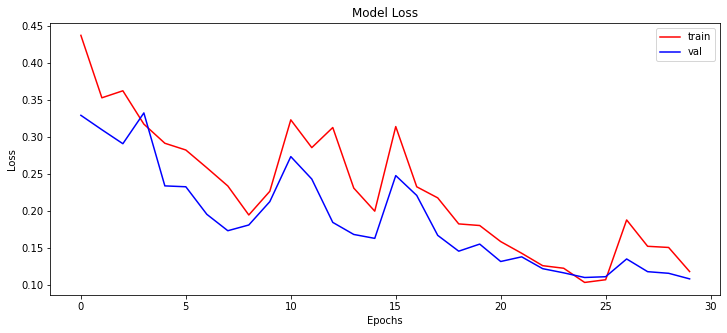

In [39]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [40]:
scores = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

16/16 [==============================] - 0s 14ms/step - loss: 0.1582 - accuracy: 0.9503
Test Accuracy: 95.02981901168823


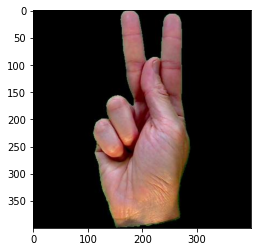

1/1 [==============================] - 0s 23ms/step
Day la k


In [42]:
import matplotlib.image as mpimg
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
filename = r'D:\HK 2 2021 - 2022\AI\project-cuoiki\file image\data_image\k\hand1_k_bot_seg_3_cropped.jpeg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (50,50))
img = img_to_array(img)
img =  img.reshape(1,50,50,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la 0')
elif kq ==1:
  print('Day la 1')
elif kq ==2:
  print('Day la 2')
elif kq ==3:
  print('Day la 3')
elif kq ==4:
  print('Day la 4')
elif kq ==5:
  print('Day la 5')
elif kq ==6:
  print('Day la 6')
elif kq ==7:
  print('Day la 7')
elif kq ==8:
  print('Day la 8')
elif kq ==9:
  print('Day la 9')
if kq==10:
  print('Day la a')
elif kq ==11:
  print('Day la b')
elif kq ==12:
  print('Day la c')
elif kq ==13:
  print('Day la d')
elif kq ==14:
  print('Day la e')
elif kq ==15:
  print('Day la f')
elif kq ==16:
  print('Day la g')
elif kq ==17:
  print('Day la h')
elif kq ==18:
  print('Day la i')
elif kq ==19:
  print('Day la j')
if kq==20:
  print('Day la k')
elif kq ==21:
  print('Day la l')
elif kq ==22:
  print('Day la m')
elif kq ==23:
  print('Day la n')
elif kq ==24:
  print('Day la o')
elif kq ==25:
  print('Day la p')
elif kq ==26:
  print('Day la q')
elif kq ==27:
  print('Day la r')
elif kq ==28:
  print('Day la s')
elif kq ==29:
  print('Day la t')
if kq==30:
  print('Day la u')
elif kq ==31:
  print('Day la v')
elif kq ==32:
  print('Day la w')
elif kq ==33:
  print('Day la x')
elif kq ==34:
  print('Day la y')
elif kq ==35:
  print('Day la z')


In [43]:
model.save('handsign_recognition_30epochs.h5')